In [1]:
import pandas as pd
import seaborn as sns

%pylab inline
plt.style.use('ggplot')

matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

Populating the interactive namespace from numpy and matplotlib


## Does training imputation rate affect inference imputation rate?

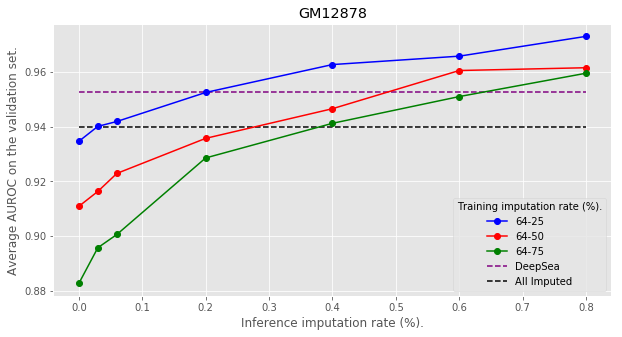

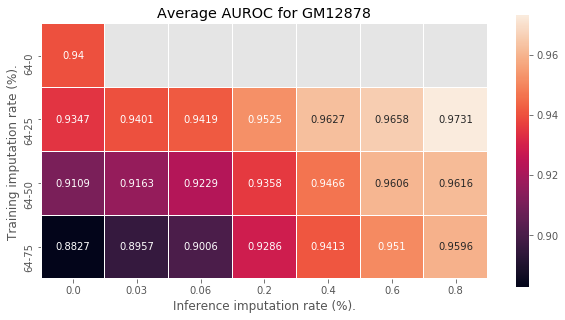

In [2]:
# All trained with a 6-layer transformer using a batch size of 64.
inference_imputation_rates =  [0., 0.03        , 0.06        , 0.2         , 0.4        , 0.6         , 0.8         ]
training_imputation_rate_25 = [np.nan, 0.90332675  , 0.90909314  , 0.92329884  , 0.9359132  , 0.94486266  , 0.9483756   ]
training_imputation_rate_50 = [np.nan, 0.89187247  , 0.8966351   , 0.9187866   , 0.9281235  , 0.9455117   , 0.95022446  ]
training_imputation_rate_75 = [np.nan, 0.8803831   , 0.8879553   , 0.9152814   , 0.9306369  , 0.94047886  , 0.9482919   ]

data = np.array([
[0., 0.03        , 0.06        , 0.2         , 0.4        , 0.6         , 0.8         ],
#[np.nan, 0.90332675  , 0.90909314  , 0.92329884  , 0.9359132  , 0.94486266  , 0.9483756   ],
#[np.nan, 0.89187247  , 0.8966351   , 0.9187866   , 0.9281235  , 0.9455117   , 0.95022446  ],
#[np.nan, 0.8803831   , 0.8879553   , 0.9152814   , 0.9306369  , 0.94047886  , 0.9482919   ],
[0.9400349, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
# [0.9400349, 0.9400349, 0.9400349, 0.9400349, 0.9400349, 0.9400349, 0.9400349],
[0.93465877,0.940136,0.9419278,0.9525349,0.96274924,0.9658257,0.9730715],
[0.91087794,0.91634136,0.9229257,0.9357503,0.946601,0.960574,0.9615916],
[0.88267183,0.89573467,0.90058565,0.92858547,0.94125956,0.9510417,0.95958596]
]).T

df = pd.DataFrame({x[0]: x[1:] for x in data})

df.index = [#"32-25","32-5","32-75",
            "64-0","64-25","64-50","64-75"]

# plt.plot(df.loc["32-25"], "red", marker="o")
# plt.plot(df.loc["32-5"], "orange", marker="o")
# plt.plot(df.loc["32-75"], "yellow", marker="o")
# plt.plot(df.loc["64-0"], "green", marker="o")
plt.plot(df.loc["64-25"], "blue", marker="o")
plt.plot(df.loc["64-50"], "red", marker="o")
plt.plot(df.loc["64-75"], "green", marker="o")
plt.hlines(0.9526,  # Baseline DeepSEA plot
           0,
           0.8,
           linestyle='--',
           color="purple",
           label='DeepSea')
plt.hlines(0.9400349,  
           0,
           0.8,
           linestyle='--',
           label='All Imputed')

# for _, row in df.iterrows():
#     for inference_imputation_rate, average_auroc in row.items():
#         plt.annotate(s=average_auroc, xy=(
#             inference_imputation_rate, average_auroc))
plt.title("GM12878")
plt.xlabel("Inference imputation rate (%).")
plt.ylabel("Average AUROC on the validation set.")
plt.legend(title="Training imputation rate (%).")
plt.show()


sns.heatmap(df, annot=True, fmt=".4", linewidths=0.01, square=True)
plt.title("Average AUROC for GM12878")
plt.xlabel("Inference imputation rate (%).")
plt.ylabel("Training imputation rate (%).")
plt.show()

## Training models with a mini-batch size of 64

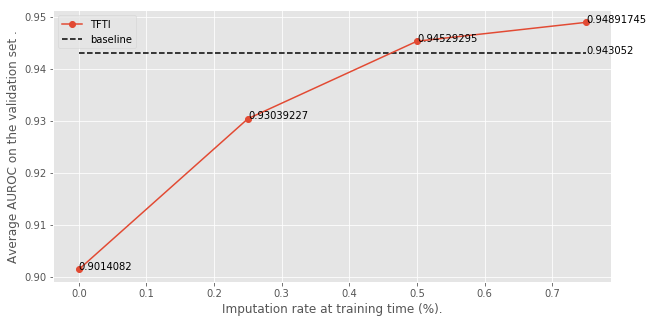

In [3]:
# All trained with a 6-layer transformer using a batch size of 64.
# Trained for 20,000 gradient steps.

training_imputation_rates = [0.         , 0.25        , 0.5         , 0.75        ]
average_aurocs            = [0.9014082  , 0.93039227  , 0.94529295  , 0.94891745  ]

plt.hlines(0.943052,  # Baseline DeepSEA plot
           min(training_imputation_rates),
           max(training_imputation_rates),
           linestyle='--',
           label='baseline')

plt.annotate(s=0.943052, xy=(max(training_imputation_rates), 0.943052))

plt.plot(training_imputation_rates, average_aurocs, label="TFTI", marker="o")
for x, y in zip(training_imputation_rates, average_aurocs):
    plt.annotate(s=y, xy=(x, y))

plt.title("")
plt.xlabel("Imputation rate at training time (%).")
plt.ylabel("Average AUROC on the validation set .")

plt.legend()
plt.show()